# 과제 4
## 이선규
## 컴퓨터공학과
## 201302376


# 1. Canny 에지 검출
본인이 촬영한 영상(크기를 800x800 이하로 조절)에 σ = 1, 3, 5, 7로 변화시킨 Canny 에지 검출을 수행하고 소스 코드와 결과 영상을 제시. Threshold를 적절히 조절.


In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

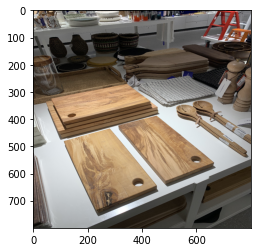

In [2]:
img = cv.imread('IMG_6741.png')
img_resize = cv.resize(img, dsize=(800,800))
plt.imshow(cv.cvtColor(img_resize, cv.COLOR_BGR2RGB))

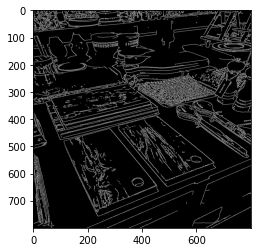

In [18]:
gray = cv.cvtColor(img_resize, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 125, 200, 1)
plt.imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))

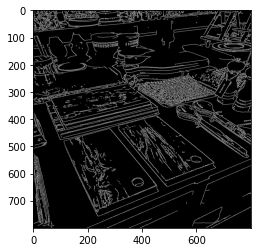

In [19]:
edges = cv.Canny(gray, 125, 200, 3)
plt.imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))

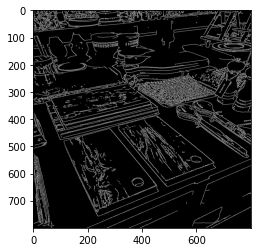

In [20]:
edges = cv.Canny(gray, 125, 200, 5)
plt.imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))

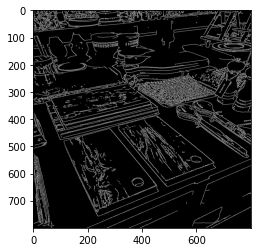

In [21]:
edges = cv.Canny(gray, 125, 200, 7)
plt.imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))

# 2. 히스토그램 평활화


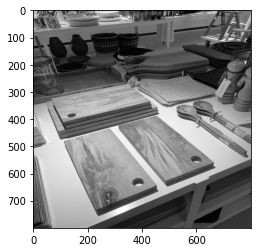

In [7]:
gray = cv.cvtColor(img_resize, cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))


## A. 영상을 다음의 수식으로 변화시킴: dst = 0.6*img + 50
## B. 11쪽의 코드를 이용하여 평활화를 수행하고 코드와 결과 영상을 제시

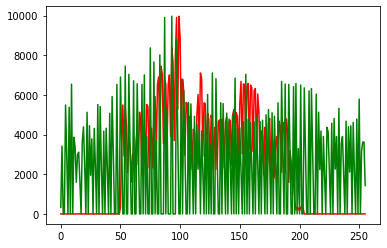

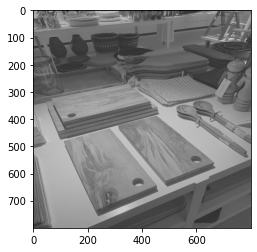

In [8]:
scaled = cv.addWeighted(gray, 0.6, 0, 0, 50)
equ = cv.equalizeHist(scaled)

hist1 = cv.calcHist([scaled], [0], None, [256], [0, 256])
hist2 = cv.calcHist([equ], [0], None, [256], [0, 256])

plt.plot(hist1, color = 'r')
plt.plot(hist2, color = 'g')
plt.show()
plt.imshow(cv.cvtColor(scaled, cv.COLOR_BGR2RGB))

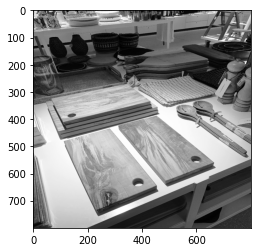

In [9]:
plt.imshow(cv.cvtColor(equ, cv.COLOR_BGR2RGB))

## C. equalizeHist 함수의 기능을 구현한 eqHist 함수를 작성하고 코드와 결과 영상을 제시

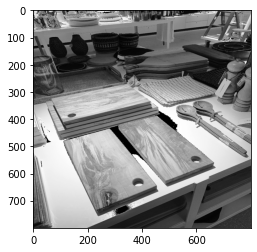

In [12]:
def eqHist(img):
    N = len(img)
    M = len(img[0])
    
    #calculate histogram
    hist = [0 for x in range(256) ]
    for line in img:
        for x in line:
            hist[x] += 1
    
    #histogram nomalize
    hist_normalize = [float(x/(M*N)) for x in hist]
    
    #accumaulate histogram
    c_hist = [0 for x in range(256)]
    c_hist[0] = hist_normalize[0]
    for i in range(1, len(hist_normalize)):
        c_hist[i] = c_hist[i-1] + hist_normalize[i]

    #calculate l_out
    l_out = [round(x * 256) for x in c_hist]
    
    #apply l_out to img
    for x in range(N):
        for y in range(M):
            img[x][y] = l_out[img[x][y]]
    return img
    
equ2 = eqHist(scaled)
plt.imshow(cv.cvtColor(equ2, cv.COLOR_BGR2RGB))
